In [68]:
import scanpy as sc

#file_path = 'CytAssist_11mm_FFPE_Human_Lung_Cancer_filtered_feature_bc_matrix.h5'

adata = sc.read_visium(path = '',count_file = 'CytAssist_11mm_FFPE_Human_Lung_Cancer_filtered_feature_bc_matrix.h5')
print(adata)

C:\Users\User\miniconda3\envs\py39\lib\site-packages\anndata\_core\anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 6195 × 18085
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'


C:\Users\User\miniconda3\envs\py39\lib\site-packages\anndata\_core\anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [43]:
a = pd.read_csv('spatial/tissue_positions_list.csv')
print(a.dtypes)

CGAGGATATTCAGAGC-1    object
0                      int64
0.1                    int64
0.2                    int64
33590                  int64
926                    int64
dtype: object


In [44]:
a = pd.read_csv('Lymph Node/spatial/tissue_positions_lymph.csv')
print(a.dtypes)

ACGCCTGACACGCGCT-1    object
0                      int64
0.1                    int64
0.2                    int64
1010                   int64
1309                   int64
dtype: object


In [3]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
#adata = sc.datasets.visium_sge(sample_id="V1_Human_Lymph_Node")
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

<Axes: xlabel='n_genes_by_counts', ylabel='Count'>

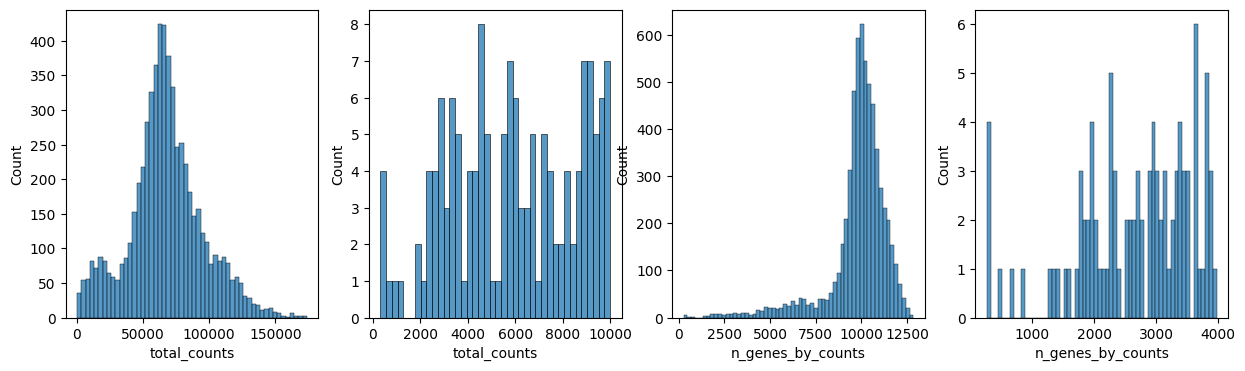

In [70]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.histplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.histplot(
    adata.obs["total_counts"][adata.obs["total_counts"] < 10000],
    kde=False,
    bins=40,
    ax=axs[1],
)
sns.histplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.histplot(
    adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000],
    kde=False,
    bins=60,
    ax=axs[3],
)

In [71]:
sc.pp.filter_cells(adata, min_counts=5000)
sc.pp.filter_cells(adata, max_counts=35000)
adata = adata[adata.obs["pct_counts_mt"] < 20].copy()
print(f"#cells after MT filter: {adata.n_obs}")
sc.pp.filter_genes(adata, min_cells=10)

#cells after MT filter: 644


In [72]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

In [73]:
#pip install leidenalg

In [74]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(
    adata, key_added="clusters", directed=False, n_iterations=2
)

C:\Users\User\miniconda3\envs\py39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


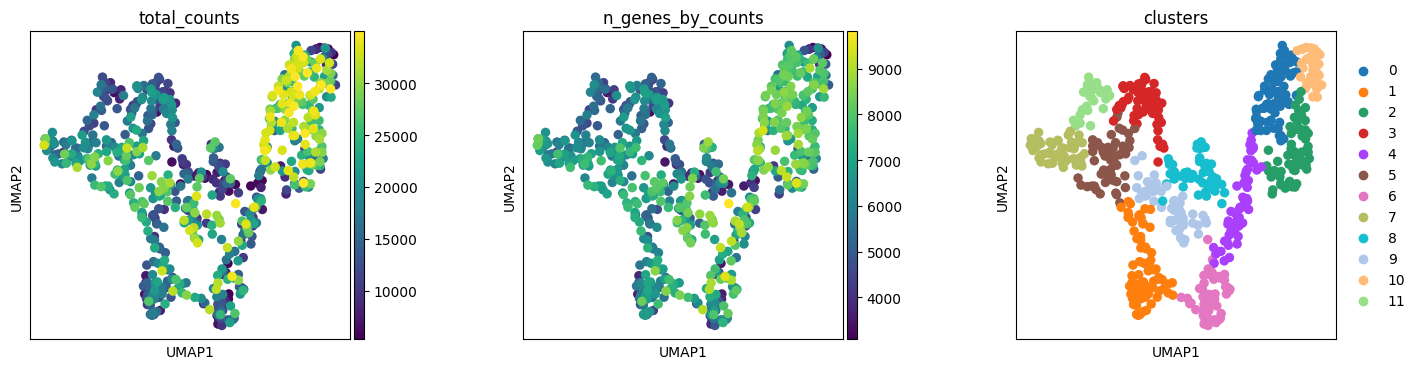

In [75]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "clusters"], wspace=0.4)

In [76]:
#pd.read_csv('tissue_position_list.csv')

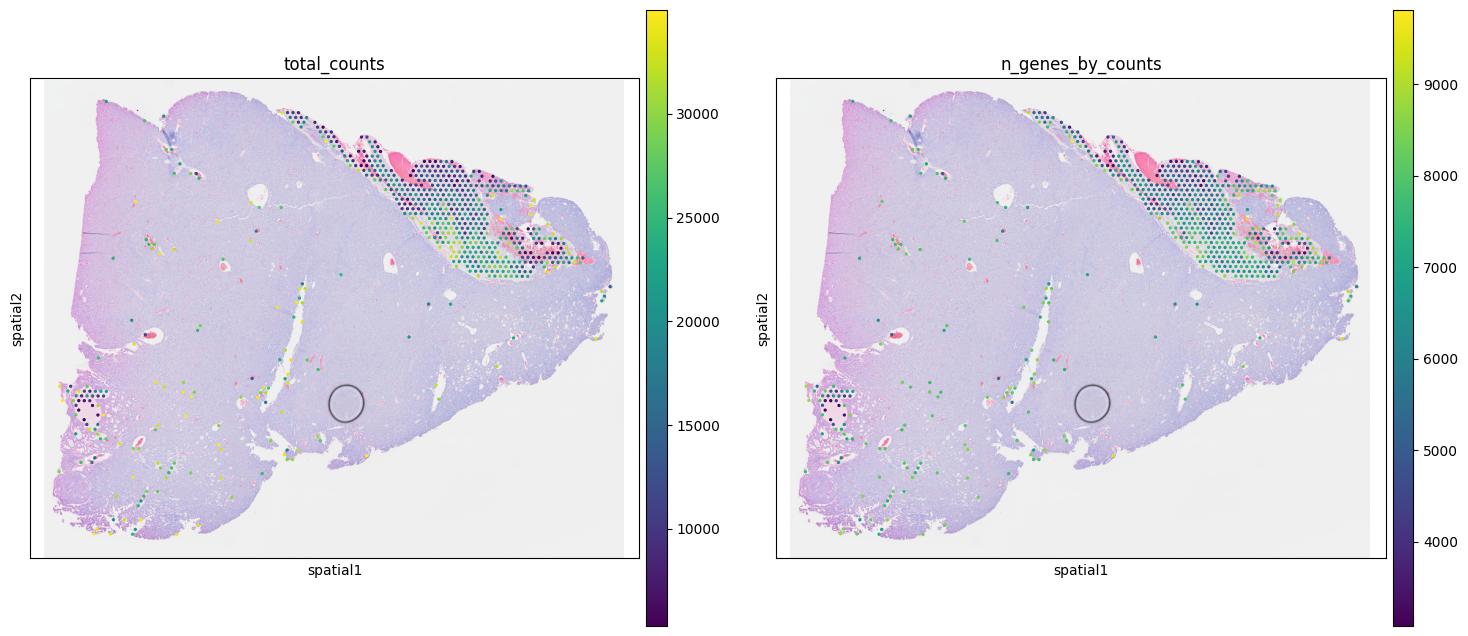

In [77]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="hires", color=["total_counts", "n_genes_by_counts"])

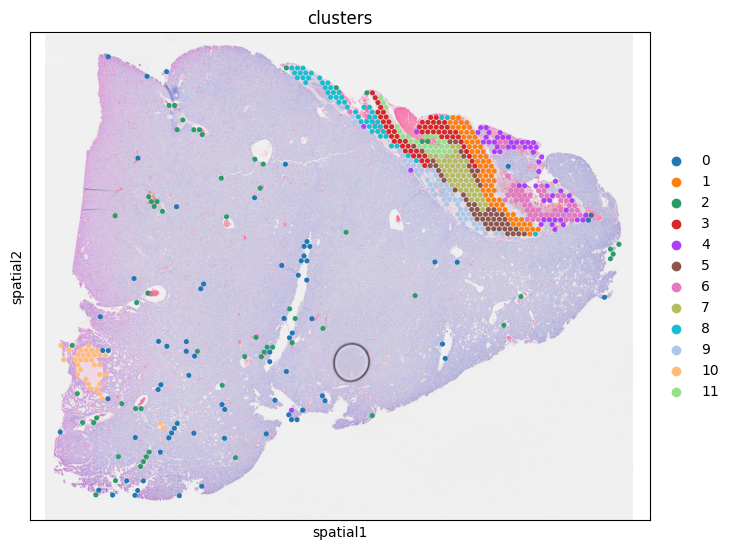

In [78]:
sc.pl.spatial(adata, img_key="hires", color="clusters", size=1.5)

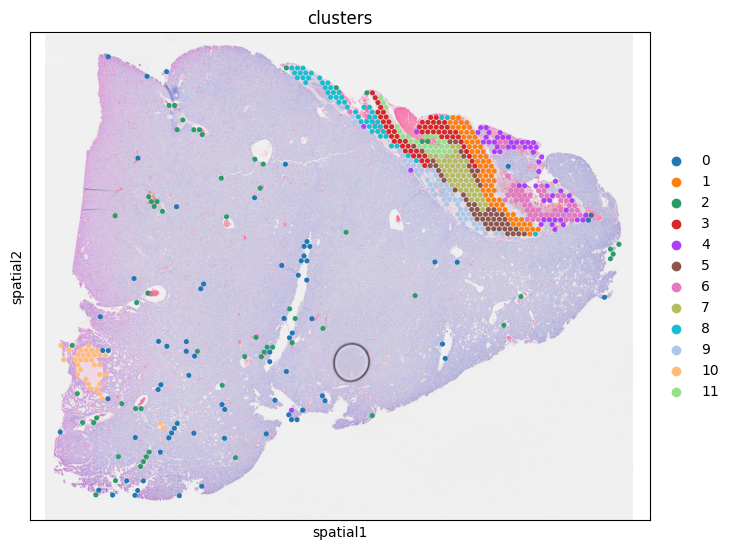

In [79]:
sc.pl.spatial(adata, img_key="hires", color="clusters", size=1.5)

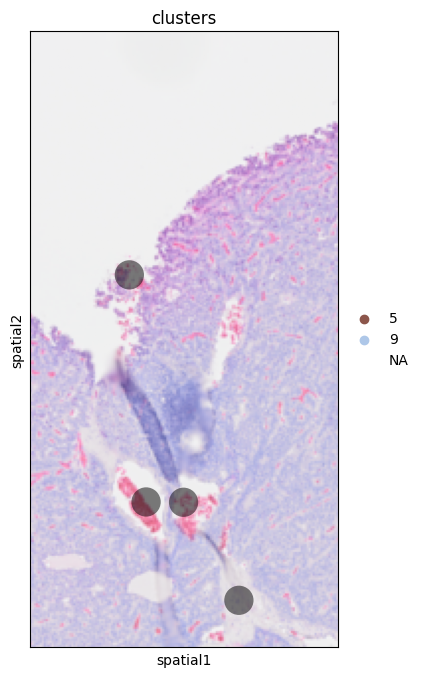

In [80]:
sc.pl.spatial(
    adata,
    img_key="hires",
    color="clusters",
    groups=["5", "9"],
    crop_coord=[7000, 10000, 0, 6000],
    alpha=0.5,
    size=1.3,
)

categories: 0, 1, 2, etc.
var_group_labels: 9


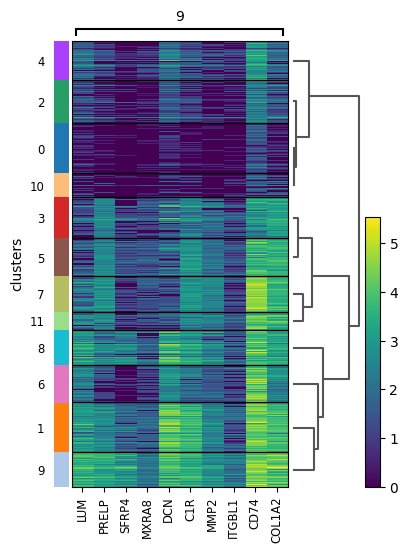

In [81]:
sc.tl.rank_genes_groups(adata, "clusters", method="t-test")
sc.pl.rank_genes_groups_heatmap(adata, groups="9", n_genes=10, groupby="clusters")

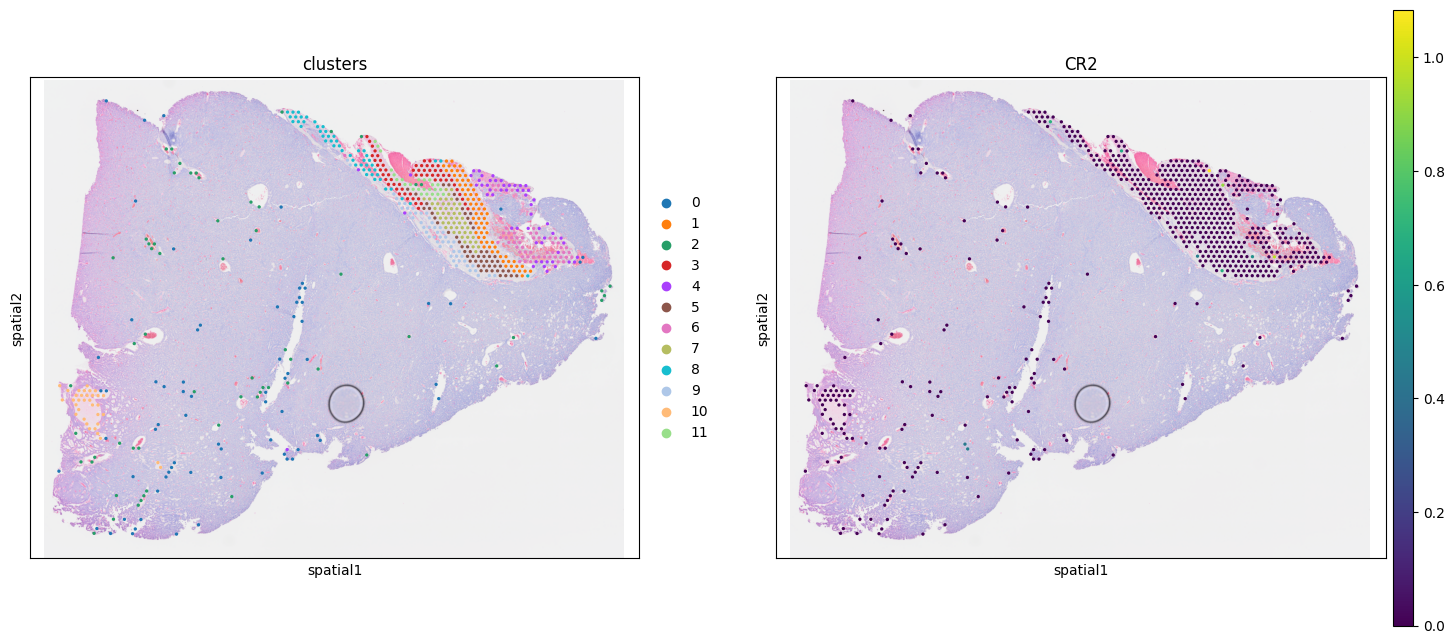

In [82]:
sc.pl.spatial(adata, img_key="hires", color=["clusters", "CR2"])

In [ ]:
## Inegration with 

In [62]:
import scanpy as sc
import anndata as an
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanorama

from pathlib import Path

In [63]:
adata_sc = sc.read("sclcCells.h5ad")
adata_sc

C:\Users\User\miniconda3\envs\py39\lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  


AnnData object with n_obs × n_vars = 20631 × 56295
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'core_or_extension', 'dataset', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'smoking_status', 'study', 'subject_type', 'tissue_coarse_unharmonized', 't

In [83]:
adata.var.set_index("gene_ids", inplace=True)

In [84]:
adata

AnnData object with n_obs × n_vars = 644 × 17844
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'clusters'
    var: 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'spatial', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'clusters_colors', 'rank_genes_groups', 'dendrogram_clusters'
    obsm: 'spatial', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [90]:
adata_cor = scanorama.correct(adata.X, return_dimred=True, genes_list = adata.var_names.to_list())

Found 5 genes among all datasets


AssertionError: 

In [66]:
adata_cor_1 = sc.concat(
    adata_cor,
    label="dataset",
    keys=["smart-seq", "visium"],
    join="outer",
    uns_merge="first",
)

ValueError: codes need to be between -1 and len(categories)-1